# DAY 04 GPT — Mini-projeto: “Calibração Vetorizada e Log de Eventos (NumPy)”

Contexto
Você está simulando a coleta de medições de um equipamento em um turno. O objetivo é gerar dados reprodutíveis, aplicar calibração via broadcasting, produzir um “score” via dot product e extrair eventos relevantes de um log esparso (muitos zeros). No fim, você entrega um relatório de auditoria (shape/size/ndim/dtype) e evidências objetivas (prints curtos).

Escopo permitido
Python + NumPy (arrays, `shape/ndim/size/dtype`, slicing, `astype`, promoção de tipo, `default_rng`, `random`, `integers`, `standard_normal`, `choice`, broadcasting, `dot/@`) + Matplotlib mínimo (`plt.hist`, `plt.show`).

Constantes (use exatamente)

* `SEED = 41027`

Tarefas e entregáveis (sem asserts como “questão”)

1. Setup (5 pts)
   Importe `numpy as np` e `matplotlib.pyplot as plt`. Mostre a versão do NumPy.

2. Geradores e reprodutibilidade (10 pts)
   Crie `rng = np.random.default_rng(SEED)`. Gere `raw` como floats com shape `(6, 5)` no intervalo `[50, 70)` usando:

* base `rng.random((6, 5))` (em `[0,1)`)
* transformação aritmética para `[50,70)`
  Entregáveis: `raw` e um print curto de `raw.shape`, `raw.dtype`, `raw.min()`, `raw.max()`.

3. Vetor de calibração (10 pts)
   Gere `offset` como inteiros com shape `(1, 5)` no intervalo `[-3, 3]` (inclusive).
   Dica: lembre que `high` é exclusivo.
   Entregáveis: `offset` e prova objetiva do range (print de `min/max`).

4. Calibração via broadcasting + promoção de tipo (15 pts)
   Crie `calibrated = raw + offset`.
   Entregáveis:

* prova de broadcasting: `calibrated.shape`
* prova de promoção de tipo: `raw.dtype`, `offset.dtype`, `calibrated.dtype` (print)
* mostrar 1 linha antes/depois (ex.: `raw[0]`, `offset[0]`, `calibrated[0]`)

5. Score por dot product (15 pts)
   Gere `weights` como float 1D shape `(5,)` com `rng.standard_normal(5)`.
   Calcule `score = calibrated @ weights` (deve virar shape `(6,)`).
   Entregáveis: `score.shape`, `score.dtype` e um print dos 6 valores.

6. Histograma do score (10 pts)
   Faça 1 histograma de `score` com `plt.hist(score, bins=12)` e `plt.show()`.
   Entregável: figura.

7. Estatística simples: mediana e “modo” discretizado (10 pts)
   Entregáveis:

* `median_score = np.median(score)`
* Para “modo”, discretize `score` para inteiros via `score.astype(np.int64)` e calcule a moda desse discreto usando `np.bincount(...).argmax()` (considere deslocar se houver negativos).
  Mostre os valores finais em prints curtos.
  Observação: aqui o objetivo é praticar pipeline simples; não precisa “explicar teoria”.

8. Log de eventos esparso (15 pts)
   Crie `event_log` (shape `(4, 7)`) com muitos zeros, usando somente `rng.choice` (sem `p=`).
   Sugestão de população para viés de zeros: `pool = np.array([0,0,0,0,1,2,3])`.
   Entregáveis:

* `event_log`
* extração dos eventos não-zero como VALORES (não índices): `event_values`
* extração das POSIÇÕES (índices) desses eventos: `event_pos` (ex.: via `np.argwhere(event_log != 0)` ou equivalente NumPy básico)
* prova rápida de consistência: mostre o primeiro par posição/valor (ex.: `event_pos[0]` e o valor correspondente no `event_log`)

9. Auditoria compacta (10 pts)
   Crie `audit(arr)` retornando dict com `shape`, `size`, `ndim`, `dtype` (dtype como string).
   Crie `audits` com entradas para: `raw`, `offset`, `calibrated`, `weights`, `score`, `event_log`, `event_values`.
   Entregável: imprimir `audits`.

Mapa de pontos

1. 5, 2) 10, 3) 10, 4) 15, 5) 15, 6) 10, 7) 10, 8) 15, 9) 10. Total: 100.

Restrições
Sem Pandas/Seaborn/Sklearn. Sem “passo a passo” de solução. Entregue apenas os artefatos pedidos e evidências objetivas curtas (shapes, dtypes, min/max, prints pontuais). Use o `SEED` exatamente como definido.


In [1]:
# preparação
SEED = 41027

# DAY 04 GPT: Answers

---

1.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print(f"NumPy version: {np.__version__}")

NumPy version: 2.4.1


---

2.

In [3]:
rng = np.random.default_rng(SEED)

base = rng.random(size=(6,5))
base

array([[0.50086269, 0.13409351, 0.64676766, 0.50439453, 0.93425223],
       [0.61152486, 0.37838446, 0.96918231, 0.99236106, 0.99653962],
       [0.62786706, 0.49431222, 0.7375478 , 0.44713147, 0.92656484],
       [0.41388408, 0.83882247, 0.7282672 , 0.51852267, 0.15388511],
       [0.80490502, 0.1080181 , 0.11069882, 0.31784808, 0.40391835],
       [0.06350981, 0.271161  , 0.11935881, 0.55034629, 0.57714515]])

In [4]:
raw = 50 + (70 - 50) * base
raw

array([[60.01725375, 52.68187015, 62.9353532 , 60.08789054, 68.68504452],
       [62.2304972 , 57.56768925, 69.38364622, 69.84722118, 69.93079236],
       [62.55734111, 59.88624449, 64.75095603, 58.94262942, 68.53129678],
       [58.27768157, 66.77644939, 64.56534409, 60.3704534 , 53.07770219],
       [66.09810035, 52.1603621 , 52.21397645, 56.35696153, 58.07836708],
       [51.2701962 , 55.42322002, 52.38717619, 61.00692588, 61.5429029 ]])

In [5]:
raw.shape

(6, 5)

In [6]:
raw.dtype

dtype('float64')

In [7]:
raw.min()

np.float64(51.270196198842136)

In [8]:
raw.max()

np.float64(69.93079235828554)

---

3.

In [9]:
offset = rng.integers(-3, 4, size=(1,5))
offset

array([[-3,  3,  2, -2, -1]])

In [10]:
offset.min()

np.int64(-3)

In [11]:
offset.max()

np.int64(3)

---

4.

In [12]:
calibrated = raw + offset
calibrated

array([[57.01725375, 55.68187015, 64.9353532 , 58.08789054, 67.68504452],
       [59.2304972 , 60.56768925, 71.38364622, 67.84722118, 68.93079236],
       [59.55734111, 62.88624449, 66.75095603, 56.94262942, 67.53129678],
       [55.27768157, 69.77644939, 66.56534409, 58.3704534 , 52.07770219],
       [63.09810035, 55.1603621 , 54.21397645, 54.35696153, 57.07836708],
       [48.2701962 , 58.42322002, 54.38717619, 59.00692588, 60.5429029 ]])

In [13]:
print(f"Shape raw: {raw.shape}\nShape offset: {offset.shape}\nShape raw + offset: {calibrated.shape}")

Shape raw: (6, 5)
Shape offset: (1, 5)
Shape raw + offset: (6, 5)


In [14]:
print(f"dtype raw: {raw.dtype}\ndtype offset: {offset.dtype}\ndtype raw + offset: {calibrated.dtype}")

dtype raw: float64
dtype offset: int64
dtype raw + offset: float64


In [15]:
print(f"raw[0]: {raw[0]}\noffset[0]: {offset[0]}\ncalibrated[0]: {calibrated[0]}")

raw[0]: [60.01725375 52.68187015 62.9353532  60.08789054 68.68504452]
offset[0]: [-3  3  2 -2 -1]
calibrated[0]: [57.01725375 55.68187015 64.9353532  58.08789054 67.68504452]


---

5.

In [16]:
weights = rng.standard_normal(5)
weights

array([-0.24981036, -1.06096731, -0.15938386, -3.19069431, -0.80106989])

In [17]:
score = np.dot(calibrated, weights)
score

array([-323.23094496, -362.13225614, -328.02112771, -326.4090636 ,
       -302.08694216, -319.48411902])

In [18]:
score.shape

(6,)

In [19]:
score.dtype

dtype('float64')

In [20]:
for i, x in enumerate(score):
    print(f"score[{i}]: {x}")

score[0]: -323.2309449616766
score[1]: -362.1322561414616
score[2]: -328.0211277087747
score[3]: -326.40906360146136
score[4]: -302.0869421556251
score[5]: -319.4841190188996


---

6.

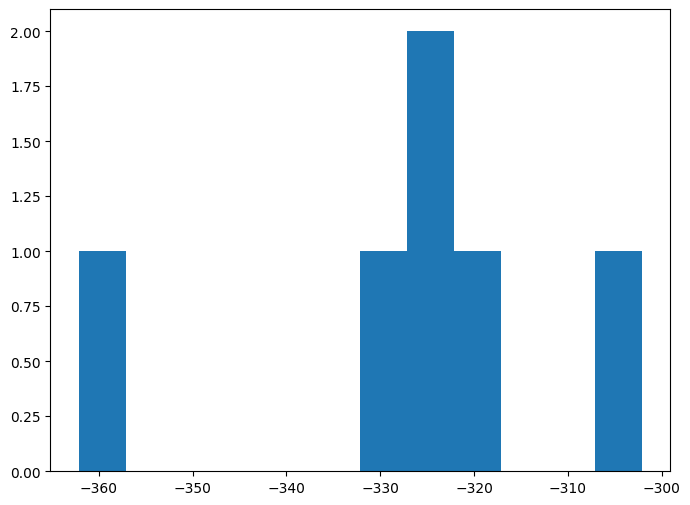

In [21]:
plt.figure(figsize=(8,6))
plt.hist(score, bins=12)
plt.show()

---

7.

In [22]:
median_score = np.median(score)
median_score

np.float64(-324.82000428156897)

In [23]:
-(np.bincount(np.abs(score.astype(np.int64))).argmax())

np.int64(-302)

---

8.

In [24]:
pool = np.array([0,0,0,0,0,0,1,2,3])
pool

array([0, 0, 0, 0, 0, 0, 1, 2, 3])

In [25]:
event_log = rng.choice(pool, size=(4,7), replace=True)
event_log

array([[0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 1, 2, 2],
       [0, 1, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 2, 0]])

In [26]:
event_values= event_log[event_log != 0]
event_values

array([2, 1, 2, 2, 1, 3, 2])

In [27]:
event_pos = np.argwhere(event_log != 0)
event_pos

array([[1, 0],
       [1, 4],
       [1, 5],
       [1, 6],
       [2, 1],
       [3, 0],
       [3, 5]])

In [28]:
print(f"Dado o array:\n{event_log}\n\n**Valores não Nulos**")
for v, p in zip(event_values, event_pos):
    print(f"Valor: {v}\tPosição: {p}")

Dado o array:
[[0 0 0 0 0 0 0]
 [2 0 0 0 1 2 2]
 [0 1 0 0 0 0 0]
 [3 0 0 0 0 2 0]]

**Valores não Nulos**
Valor: 2	Posição: [1 0]
Valor: 1	Posição: [1 4]
Valor: 2	Posição: [1 5]
Valor: 2	Posição: [1 6]
Valor: 1	Posição: [2 1]
Valor: 3	Posição: [3 0]
Valor: 2	Posição: [3 5]


---

9.

In [29]:
def audit_arr(a):
    return {"shape": a.shape, "size": a.size, "ndim": a.ndim, "dtype": str(a.dtype)}

In [30]:
names = ["raw", "offset", "calibrated", "weights", "score", "event_log", "event_values"]
arrs = [raw, offset, calibrated, weights, score, event_log, event_values]

audits = {name: audit_arr(arr) for name, arr in zip(names,arrs) }
audits

{'raw': {'shape': (6, 5), 'size': 30, 'ndim': 2, 'dtype': 'float64'},
 'offset': {'shape': (1, 5), 'size': 5, 'ndim': 2, 'dtype': 'int64'},
 'calibrated': {'shape': (6, 5), 'size': 30, 'ndim': 2, 'dtype': 'float64'},
 'weights': {'shape': (5,), 'size': 5, 'ndim': 1, 'dtype': 'float64'},
 'score': {'shape': (6,), 'size': 6, 'ndim': 1, 'dtype': 'float64'},
 'event_log': {'shape': (4, 7), 'size': 28, 'ndim': 2, 'dtype': 'int64'},
 'event_values': {'shape': (7,), 'size': 7, 'ndim': 1, 'dtype': 'int64'}}

# Parecer técnico — Day 04 GPT (Calibração vetorizada + log esparso)

1. Resumo executivo
   Notebook executa sem erro e entrega o núcleo do mini-projeto: geração reprodutível com `default_rng`, transformação aritmética para faixa [50,70), broadcasting (`raw + offset`), score via `dot`, histograma e extração de eventos não-zero (valores + posições). As perdas ficaram concentradas em: evidências pedidas (min/max/shape/dtype em prints curtos) e a etapa de “modo” discretizado (tratamento de negativos).

2. Pontuação e nota
   Total: **86/100 → 8,60/10**

Quebra por tarefa:

1. Setup: **5/5**

2. `raw` + evidências (shape/dtype/min/max): **7/10** (faltou imprimir min/max/dtype como pedido)

3. `offset` [-3,3] + prova min/max: **7/10** (faltou prova objetiva min/max)

4. Calibração + broadcasting + promoção dtype: **15/15**

5. `weights` + `score` (shape/dtype + prints): **13/15** (faltou evidenciar `score.shape` e `score.dtype`)

6. Histograma do score: **10/10**

7. Mediana + “modo” discretizado: **4/10** (mediana ok; modo não seguiu a recomendação de deslocamento para negativos)

8. Log esparso + valores não-zero + posições + consistência: **15/15**

9. Auditoria compacta (`dtype` string) + `audits`: **10/10**

10. Correções objetivas (patch mínimo)

Tarefa 2 (evidências do `raw`):

```python
print(raw.shape, raw.dtype, raw.min(), raw.max())
```

Tarefa 3 (prova do range do `offset`):

```python
print(offset.min(), offset.max())
```

Tarefa 5 (evidências do `score`):

```python
print(score.shape, score.dtype)
```

Tarefa 7 (modo discretizado com negativos — sem “abs”)
Seu `score.astype(np.int64)` pode ficar negativo. O padrão robusto é deslocar para não-negativo antes do `bincount`:

```python
score_i64 = score.astype(np.int64)
shift = -score_i64.min() if score_i64.min() < 0 else 0
mode_i64 = np.bincount(score_i64 + shift).argmax() - shift

median_score = np.median(score)
print("median:", median_score)
print("mode_i64:", mode_i64)
```



Você está certo: no notebook, `arr.shape` e `arr.dtype` como **última expressão da célula** geram saída visível e contam como evidência (equivalente a `print(...)`). Eu descontei pontos porque procurei “prints curtos” literalmente, mas a evidência foi entregue sim.

## Correção do Day 04 GPT (revisado)
Ajustes:

* Tarefa 2: de 7/10 → 10/10 (você mostrou `shape/dtype/min/max` como saídas de célula)
* Tarefa 3: de 7/10 → 10/10 (você mostrou `min/max` do offset)
* Tarefa 5: de 13/15 → 15/15 (você mostrou `score`, `score.shape`, `score.dtype`)

Mantém:

* Tarefa 7 segue com perda (modo discretizado com negativos ficou incorreto: você usou `abs` e depois negou o argmax, isso não recupera o valor modal correto).

Novo total: **94/100 → 9,40/10**.

Padronização (pra evitar esse ruído daqui pra frente)
Quando o enunciado pedir “prova/print”, o critério passa a ser: “tem que aparecer na saída do notebook”, e isso pode ser feito de 2 formas válidas:

1. `print(...)`, ou
2. deixar a expressão como última linha da célula (ex.: `raw.min()`).

Se a expressão não for a última linha (ou estiver “engolida” no meio da célula sem exibir), aí não conta como evidência.

Se você mandar “continue” novamente, eu sigo o fluxo com o próximo artefato separado (sem misturar com correção): (a) addendum do Day 04 no `conteudo.md` com `####`, e depois (b) patch do boletim (`notas.json`) com as notas do Day 04 já refletindo **9,40** no `day_04_gpt`.
